<a href="https://colab.research.google.com/github/SteffanBurnette/TensorFlow-/blob/Convolutional-Neural-Networks/IntroToConvolutionalNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction To Convolutinal Neural Networks and Computer Vision

Computer vision is the practice of writing which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car infront.

#Get The data

The dataset has been modified to work with the neural network and the code to modify it is in the github repo.
https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb


In [2]:
import zipfile
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pathlib
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory


print("W")

W


In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
#!wget means get the file and download it into colab

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-01-17 01:25:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.146.207, 209.85.147.207, 142.250.125.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.146.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   203MB/s    in 0.5s    

2024-01-17 01:25:45 (203 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



The dataset was modified to use only two classes (pizza and steak) using the image data modification notebook.

🔑**Note**: We start with a smaller dataset so that we can experiment quickly and figure out what works and what doesnt work before scaling up.

### **Inspect** the data
A very crucial step at the beginnig of every machine learning project is becoming one with the data. And for a computer vision project, this usually means visualizing many samples of the data.

In [4]:
#Lists all the files in the directory
!ls pizza_steak
#List all the files in the sub directory
!ls pizza_steak/train
#List all the files in the subs sub directory
!ls pizza_steak/train/steak

test  train
pizza  steak
1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.

In [5]:
#Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

#We have an extra file in the pizza_steak directory called ".DS_Store"

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [6]:
#Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
#os.listdir() lists all of the names in a directory
num_steak_images_train

750

To visualize our images, first lets get the class names programmatically.

In [7]:
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #Created a list of names from the subdirectory
print(class_names)

['pizza' 'steak']


In [8]:
#Lets visualize our images
def view_random_image(target_dir, target_class):
  #Set up the target directory (we'll view images from here)
  target_folder = target_dir + "/"+ target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  #Randomly samples one of the samples in the directory

  #Read in an image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") #Shows the shape of the image

  return img



Image shape: (384, 512, 3)


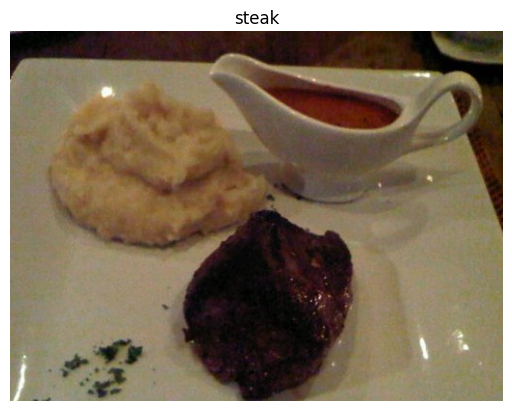

In [9]:
#View a random steak image from the training dataset
steak_img = view_random_image(target_dir = "pizza_steak/train",target_class="steak" )

Image shape: (341, 512, 3)


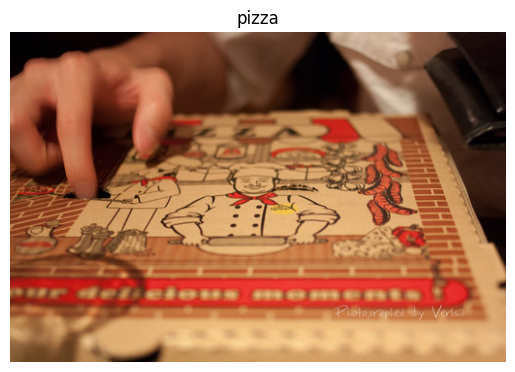

In [10]:
#View a random pizza image from the training dataset
pizza_img = view_random_image(target_dir = "pizza_steak/train",target_class="pizza" )

In [11]:
#The images that we've imported and plotted are actually giant arrays/tensors with different pixel values
#Pixel colors are always between the values 0-255
tf.constant(steak_img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[133, 120, 130],
        [119, 106, 116],
        [107,  91, 104],
        ...,
        [ 61,  55,  21],
        [ 58,  52,  26],
        [ 56,  50,  26]],

       [[ 93,  81,  91],
        [ 83,  71,  81],
        [ 76,  62,  75],
        ...,
        [ 64,  57,  28],
        [ 62,  56,  30],
        [ 62,  56,  32]],

       [[ 49,  42,  49],
        [ 44,  37,  44],
        [ 42,  32,  41],
        ...,
        [ 65,  58,  32],
        [ 65,  59,  37],
        [ 65,  59,  37]],

       ...,

       [[134, 135, 103],
        [147, 150, 119],
        [148, 150, 126],
        ...,
        [137, 136, 106],
        [138, 138, 110],
        [139, 139, 111]],

       [[131, 135, 100],
        [146, 149, 118],
        [154, 156, 132],
        ...,
        [137, 137, 103],
        [137, 138, 104],
        [138, 139, 105]],

       [[143, 147, 112],
        [149, 153, 120],
        [160, 164, 139],
        ...,
        [137, 137, 10

### Normalize the data so that it be be used more effectivly in the convolutional neural network

Divide the entire dataset by the largest value in the dataset (as type float) so that you end up with values between 0-1, which is effectivly normalizing the data.
* By this logic we divide by 255. because for pixels the values range from 0-255 (min=0, max=255 always)

🔑**Note**- If you decide to use this method you will need to do it for each image individually which will be tedious.

In [12]:
steak_train_norm = steak_img/255.
pizza_train_norm = pizza_img/255.

🔑**Note**- Many machine learning models, including neural networks perfer the values that they work with to be between 0 and 1. Knowing this, one of the most preprocessing steps for working with images is to **scale**( also reffered to as **normalize**) their pixel values by dividing the image arrays by 255.

##An End-to-End Example
Lets build a convolutionl neural network to find patterns in our images, more specifically:
* Load our images
* Preprocess our images
* Build a **`CNN`** to find patterns in our images
* Compile our **`CNN`**
* Fit the **`CNN`** to our training data


In [13]:
#Set the random seed for reproducibility
tf.random.set_seed(42)

#Preprocess the data(get all of the pixel values between 0 & 1, also called scaling/normalization)
#Two instances of imagedatagenerator
train_datagen = ImageDataGenerator(rescale=1./255.) #Is depreciated
valid_datagen = ImageDataGenerator(rescale=1./255.)

#train_datagen_notdpreciated = image_dataset_from_directory(rescale=1./255.)

#Set up paths to our datas directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"


#Input data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size = 32,
                                               target_size= (224,224),#Reshapes the images to (224,224)
                                               class_mode="binary", seed=42) #Seed is for reproducibility
#The test data is usally called validation data
valid_data =  valid_datagen.flow_from_directory(directory= test_dir, batch_size=32, target_size=(224, 224), class_mode="binary", seed=42)

#Build a CNN model (same as the tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), #Exact same as the first layer
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. Compile our CNN mode
#Will use binary cross entropy since class_mode="binary"
#The metrics will be accuracy since this is a classification problem
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#3. Fit the model
#flow_from_directory creates the data and labels automatically for us.
#So x and y is already defined in train_data which is why we can pass it by itself
model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data,
            validation_steps=len(valid_data))

#The reason why we put things into batches is so that it can all fit on the memory of the computer chip.


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 15s 187ms/step - loss: 0.6005 - accuracy: 0.6673 - val_loss: 0.3983 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4638 - accuracy: 0.7853 - val_loss: 0.4532 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 7s 141ms/step - loss: 0.4326 - accuracy: 0.8067 - val_loss: 0.3617 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 7s 143ms/step - loss: 0.4011 - accuracy: 0.8293 - val_loss: 0.3291 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 7s 146ms/step - loss: 0.3405 - accuracy: 0.8673 - val_loss: 0.3078 - val_accuracy: 0.8860


❗**Note**- If your neural network is talking long on epoch training, make sure you are connected to a GPU.

In [14]:
#Get the summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

### Using the same model as before

Lets replicate the previous classification model structure to see if it works with the image data.

Specifically, we are going to try an use a **binary classification model** over a **Convolutional Neural Network** and see how they differ.

In [15]:
#set the random seed
tf.random.set_seed(42)

#Create the model from the classification section
#We are seeing if we can use the same model structure for the binary classification model
#on the image data instead of using a CNN
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")

])
#Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
#Fit the model
history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data = valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 145ms/step - loss: 0.6939 - accuracy: 0.4780 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 114ms/step - loss: 0.6932 - accuracy: 0.4773 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 146ms/step - loss: 0.6932 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 136ms/step - loss: 0.6932 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5000


The model is performimg more poorly than the **CNN** model.

In [16]:
#Get a summary of model 2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite model_2(**Binary Classification**) having 20x more params than model_1(**Convolutional neural network**) it is performing terribly as opposed to  model_1.

In [17]:
#set the random seed
tf.random.set_seed(42)

#Create the model(same as above, but with more neurons)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
#The validation data evaluates the data while the model is training while also not showing the model
#the validation data
history_3 = model_3.fit(train_data, epochs = 5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))



Epoch 1/5
47/47 [==============================] - 9s 154ms/step - loss: 3.1161 - accuracy: 0.6087 - val_loss: 0.5190 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 5s 110ms/step - loss: 0.7479 - accuracy: 0.7207 - val_loss: 0.5421 - val_accuracy: 0.7320
Epoch 3/5
47/47 [==============================] - 6s 127ms/step - loss: 0.4952 - accuracy: 0.7673 - val_loss: 0.4206 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 5s 113ms/step - loss: 0.5366 - accuracy: 0.7620 - val_loss: 0.4405 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 6s 131ms/step - loss: 0.6285 - accuracy: 0.7400 - val_loss: 0.6297 - val_accuracy: 0.7000


In [18]:
#Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model_3 is performing better than model_2 after i added some extra neurons to the layers, but is still not performing on par with model_1(The **CNN**). However, the issue here now is that `model_3` has over 15 million params which is 500 times more than `model_1`.

Overall, when it comes to computer vision problems, `**Convolutional Neural Network Models**` are the standard as they are the most efficient.

🔑**Note**- You can think of trainable parameters as **patterns a model can learn data from**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable patterns, a **convolutional neural network seeks to sort out and learn the most important patterns in an image.** So, even though there are less learnable parameters in our **convolutional neural network**, these are often more helpful in deciphering between different **features** in an image.

### Binary Classififcation: Lets break it down

1. Become one with the data(visualize, visualize, visualize).
2. Preprocess the data (prepare it for the model, the main steps here was **normalizing**/**scaling**).
3. Create a model (Start with a baseline (for us it was the food101 paper, where we tried to compare our models performance))
4. Fit the model
5. Evaluate the model
6. Adjust differnt parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

###1.Become one with the data


Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


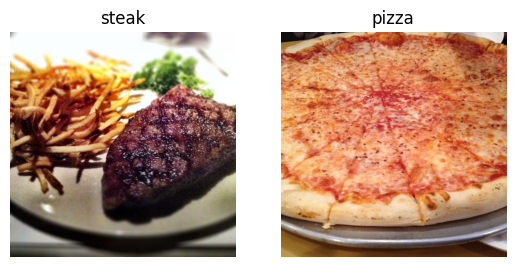

In [19]:
#Visualize the data
plt.figure()
plt.subplot(1, 2, 1)

steak_image = view_random_image("pizza_steak/train", "steak")

plt.subplot(1,2,2)
pizza_image = view_random_image("pizza_steak/train", "pizza")

###2. Preprocess the data(Prepare it for the model)

In [20]:
#Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"



Our next step is to turn our data into batches.

A batch is a small subset of data. Rather than look at all 10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why are batch sizes usually 32? After extensive research, researchers in the field determined that no batch size should be more than 32

In [21]:
!nvidia-smi

Wed Jan 17 01:27:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0              26W /  70W |   1665MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [22]:
#Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Rescale is saying, when you load the images, divide all of the pixel values by 255
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

In [23]:
#Load in our images from the directory and turn them into batches

#Set up paths to our datas directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"


#Input data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, #target directory of images
                                               batch_size = 32,   #Size of minibatches
                                               target_size= (224,224),#Reshapes the images to (224,224), the target size
                                               class_mode="binary", seed=42) #Seed is for reproducibility
#The test data is usally called validation data
test_data =  test_datagen.flow_from_directory(directory= test_dir, batch_size=32, target_size=(224, 224), class_mode="binary", seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
#Get sample of a train data batch
images, labels = train_data.next() #Get the "next" batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [25]:
#get the first two images
images[:2]

array([[[[0.42352945, 0.43137258, 0.34509805],
         [0.3137255 , 0.32941177, 0.2392157 ],
         [0.26666668, 0.28235295, 0.18431373],
         ...,
         [0.42352945, 0.34509805, 0.3803922 ],
         [0.427451  , 0.34901962, 0.39607847],
         [0.45098042, 0.36862746, 0.427451  ]],

        [[0.2901961 , 0.30588236, 0.21568629],
         [0.45882356, 0.47450984, 0.37647063],
         [0.2627451 , 0.28627452, 0.18431373],
         ...,
         [0.39607847, 0.34117648, 0.34117648],
         [0.4156863 , 0.36862746, 0.38431376],
         [0.39607847, 0.34901962, 0.3647059 ]],

        [[0.3647059 , 0.40000004, 0.29411766],
         [0.38823533, 0.42352945, 0.31764707],
         [0.30588236, 0.34117648, 0.23529413],
         ...,
         [0.34509805, 0.3254902 , 0.30980393],
         [0.30980393, 0.29803923, 0.2784314 ],
         [0.3372549 , 0.3254902 , 0.30588236]],

        ...,

        [[0.5137255 , 0.5019608 , 0.54509807],
         [0.52156866, 0.50980395, 0.54509807]

### 3. Create a **CNN** model (start with a baseline)
A `baseline` is a relatively simple model or existing result that you setup when beginning a machine learning experiment and ythen as you keep experimenting you try to beat the baseline.

🔑**Note**- How do you know which neural network architecture to use? in deep learning there is almost an infinite amount of architectures you could create. So one of the best ways to get strted is to start with something simple and see if it works on your data and then introduce complexity as required(e.g. look at which current model is performing best in the field for your problem).

In [26]:
#Make creating our model a little easier
#This way you can call the methods directly instead of typing them out fully
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential



In [27]:
#Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    #Strides=1 by default and padding="valid" by default so we dont have to set them
    #Since this is the input layer, we needed to specify the input shape
    Conv2D(filters=10,#The number of sliding windows going across an input (higher= more complex model)
           kernel_size=3,#The size of the sliding window going across an input
           strides=1, #The size of the step the sliding window takes acorss an input
           padding="valid",#if 'same' the output shape is the same as the input shape, if 'valid' output shape gets compressed
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10, 3,activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") #Output layer (Working with binary classification so only one neuron)
])

model_4.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ["accuracy"])

model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 156ms/step - loss: 0.5636 - accuracy: 0.7227 - val_loss: 0.4390 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 6s 120ms/step - loss: 0.3999 - accuracy: 0.8293 - val_loss: 0.3811 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 7s 137ms/step - loss: 0.2545 - accuracy: 0.9013 - val_loss: 0.3762 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.1321 - accuracy: 0.9580 - val_loss: 0.4962 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 6s 127ms/step - loss: 0.0498 - accuracy: 0.9913 - val_loss: 0.5076 - val_accuracy: 0.8160


In [28]:
#Compile the model
model_4.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ["accuracy"])


### 4. Fit the model

In [29]:
#Check the length of the data
len(train_data), len(test_data)

(47, 16)

In [30]:
#Fit the model
history_4 = model_4.fit(train_data,# a combination of label and sample data
            epochs=5,
            steps_per_epoch=len(train_data), #For each epoch take 47 steps (the length of the dataset), essentiall go through the entire set for each epoch
            validation_data=test_data, #Evaluates the neural network as it trains
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 164ms/step - loss: 0.1718 - accuracy: 0.9587 - val_loss: 0.4113 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.0212 - accuracy: 0.9980 - val_loss: 0.4629 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 7s 142ms/step - loss: 0.0098 - accuracy: 0.9987 - val_loss: 0.5271 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 6s 122ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.5348 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 7s 144ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.5794 - val_accuracy: 0.8380


###5. Evaluating our model
It looks like our model is learning something, lets evaluate it.


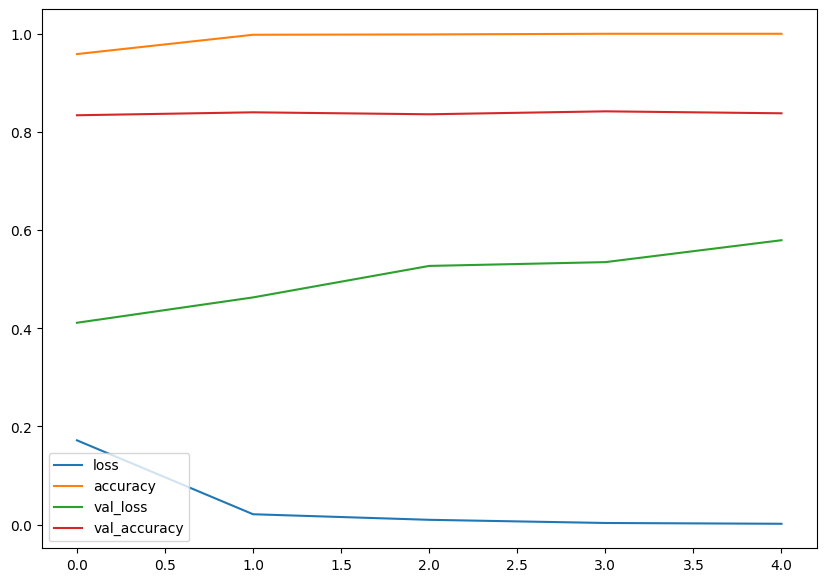

In [31]:
#Going to use the traininbg history of the model to plot the loss curve
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [32]:
#Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) #How many epochs did we run for

  #Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs,val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

    #Plot Accuracy
  plt.figure() #Creates a new figure
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs,val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

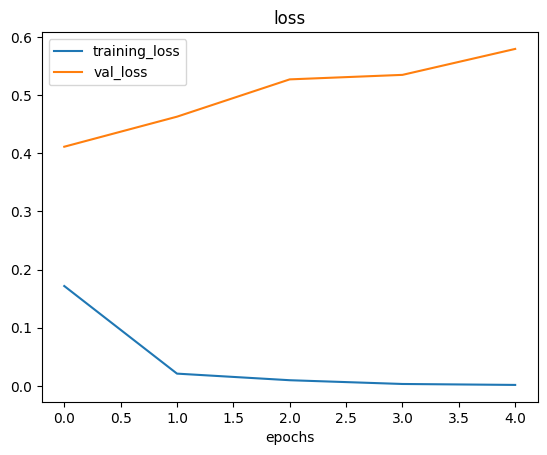

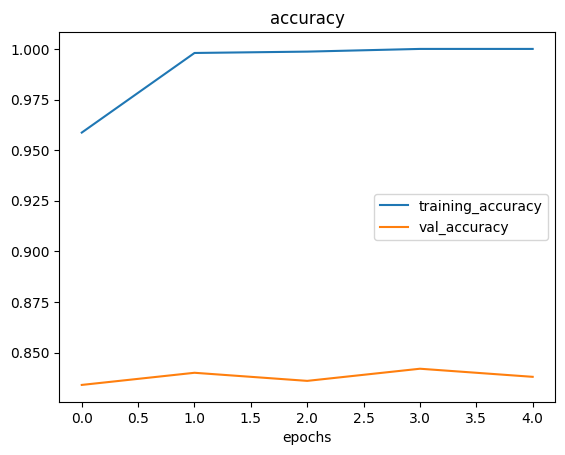

In [33]:
#Checkout the loss and accuracy of the model_4
plot_loss_curves(history_4)

🔑**NOTE**- When a models validation loss starts to increase it is likely that the model is **overfitting** on the training dataset. This means that it is learning the patterns in the training dataset too well and thus the models ability to **generalize** to unseen data will be diminished.

###6. Adjust the models parameters
Fitting a machine learning model comes in steps:
0. Create a baseline.
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

Ways to induce overfitting:
* Increase the number of **conv layer**
* Increase the number of **conv filters**
* Add another dense layer to the output of our **flatten layer**

Ways to Reduce overfitting:
* Add data augmentation
* Add regukarization layers(such as **MaxPool2D**)
* Add more data

In [34]:
#Create the model(this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [35]:
#Compile the model
model_5.compile(loss =BinaryCrossentropy(),
                optimizer=Adam(),
                metrics = ["accuracy"])

#Fit the model
history_5 = model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 173ms/step - loss: 0.6027 - accuracy: 0.6753 - val_loss: 0.4652 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 5s 112ms/step - loss: 0.4471 - accuracy: 0.8013 - val_loss: 0.3807 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.4170 - accuracy: 0.8093 - val_loss: 0.3460 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 6s 127ms/step - loss: 0.3848 - accuracy: 0.8307 - val_loss: 0.3229 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 6s 123ms/step - loss: 0.3716 - accuracy: 0.8407 - val_loss: 0.3729 - val_accuracy: 0.8380


In [36]:
#Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

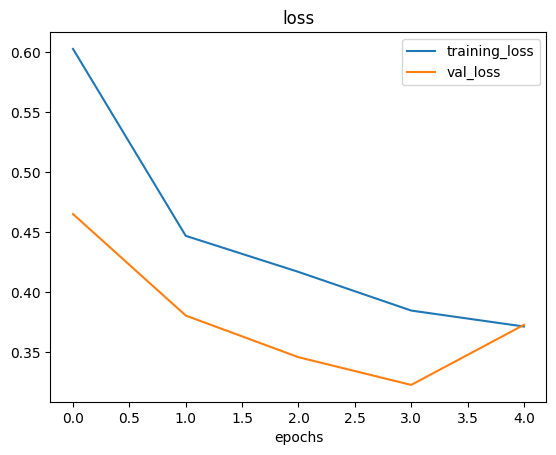

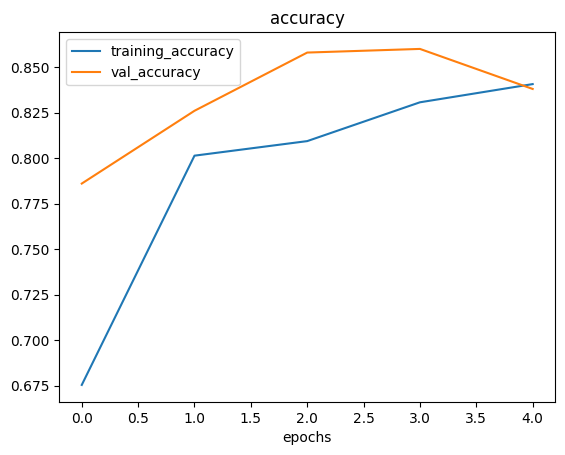

In [37]:
plot_loss_curves(history_5)

🔑**NOTE**-Reducing overfitting is know as **regularization**.

###Opening our bag of tricks and finding data augementation

In [38]:
#Create ImageDataGenerator training instance with data augmentation
#This is how you would augment your training data with ImageDateGenerator
train_datagen_augment = ImageDataGenerator(rescale=1./255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.3,
                                           horizontal_flip=True)

#Create ImageDataGenerator without data augmentation
#rescaling dramtically speeds up the procees of our neural networks finding patterns in data
train_datagen = ImageDataGenerator(rescale=1./255.)

#Create ImageDatagenerator without data augmentation for test dataset
test_datagen = ImageDataGenerator(rescale=1./255.)




❓ **What is Data Augmentation?**  ❓

**`Data Augmentation`** is the process of altering our training dataset, leading it to have more diversity and in turn allow our model to learn more generalizable (hopefully) patterns. Altering it might mean adjusting the rotation of an image, flipping it, cropping it or something similar.
